In [2]:
import pandas as pd
import numpy as np

In [4]:
df =pd.read_csv('auto-mpg.csv')

In [5]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [11]:
df[df['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [13]:
df.drop(df[df['horsepower']=='?'].index,axis=0)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [14]:
df.drop('car name',axis=1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [15]:
df['horsepower']=df['horsepower'].replace('?',100)

In [19]:
df.iloc[32]

mpg                     25
cylinders                4
displacement            98
horsepower             100
weight                2046
acceleration            19
model year              71
origin                   1
car name        ford pinto
Name: 32, dtype: object

In [20]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [24]:
df['horsepower']= df['horsepower'].astype('int64')

In [25]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [47]:
df.duplicated(subset=['cylinders','origin']).sum()

389

In [27]:
x=[[1,2,3,4,5],
  [1,2,3,4,5],
  [1,2,6,7,8],
  [1,2,6,7,5]]
y=pd.DataFrame(x,columns=['a','b','c','d','e'])
y

,a,b,c,d,e
0,1,2,3,4,5
1,1,2,3,4,5
2,1,2,6,7,8
3,1,2,6,7,5


In [42]:
y.drop_duplicates(keep="first",subset=['a','d'])

,a,b,c,d,e
0,1,2,3,4,5
2,1,2,6,7,8


In [43]:
y.duplicated().sum()

1

In [44]:
y.duplicated(subset=['a','e']).sum()

2

In [48]:
import matplotlib.pyplot as plt

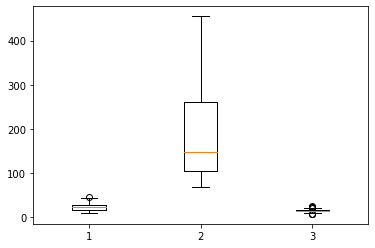

In [51]:
plt.boxplot(df[['mpg','displacement','acceleration']])
plt.show()

In [65]:
Q1=df['acceleration'].quantile(0.25)
Q3=df['acceleration'].quantile(0.75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR
df[(df['acceleration']>UL)|(df['acceleration']<LL)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl
11,14.0,8,340.0,160,3609,8.0,70,1,plymouth 'cuda 340
59,23.0,4,97.0,54,2254,23.5,72,2,volkswagen type 3
195,29.0,4,85.0,52,2035,22.2,76,1,chevrolet chevette
299,27.2,4,141.0,71,3190,24.8,79,2,peugeot 504
300,23.9,8,260.0,90,3420,22.2,79,1,oldsmobile cutlass salon brougham
326,43.4,4,90.0,48,2335,23.7,80,2,vw dasher (diesel)
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup


In [66]:
df=df[(df['mpg']<=UL)&(df['mpg']>=LL)]

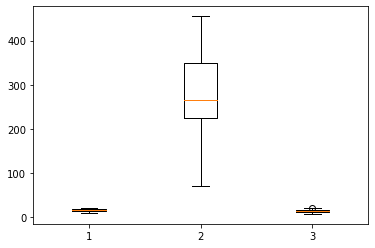

In [67]:
plt.boxplot(df[['mpg','displacement','acceleration']])
plt.show()

In [69]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.719040,-0.766389,-0.757117,-0.805781,0.463159,0.396363,0.346808
cylinders,-0.719040,1.000000,0.904010,0.749003,0.812448,-0.603573,-0.123045,-0.579814
displacement,-0.766389,0.904010,1.000000,0.841520,0.852784,-0.654976,-0.237445,-0.588610
horsepower,-0.757117,0.749003,0.841520,1.000000,0.767645,-0.763469,-0.320610,-0.259817
weight,-0.805781,0.812448,0.852784,0.767645,1.000000,-0.425096,-0.112881,-0.449114
acceleration,0.463159,-0.603573,-0.654976,-0.763469,-0.425096,1.000000,0.343990,0.106961
model year,0.396363,-0.123045,-0.237445,-0.320610,-0.112881,0.343990,1.000000,0.071514
origin,0.346808,-0.579814,-0.588610,-0.259817,-0.449114,0.106961,0.071514,1.000000


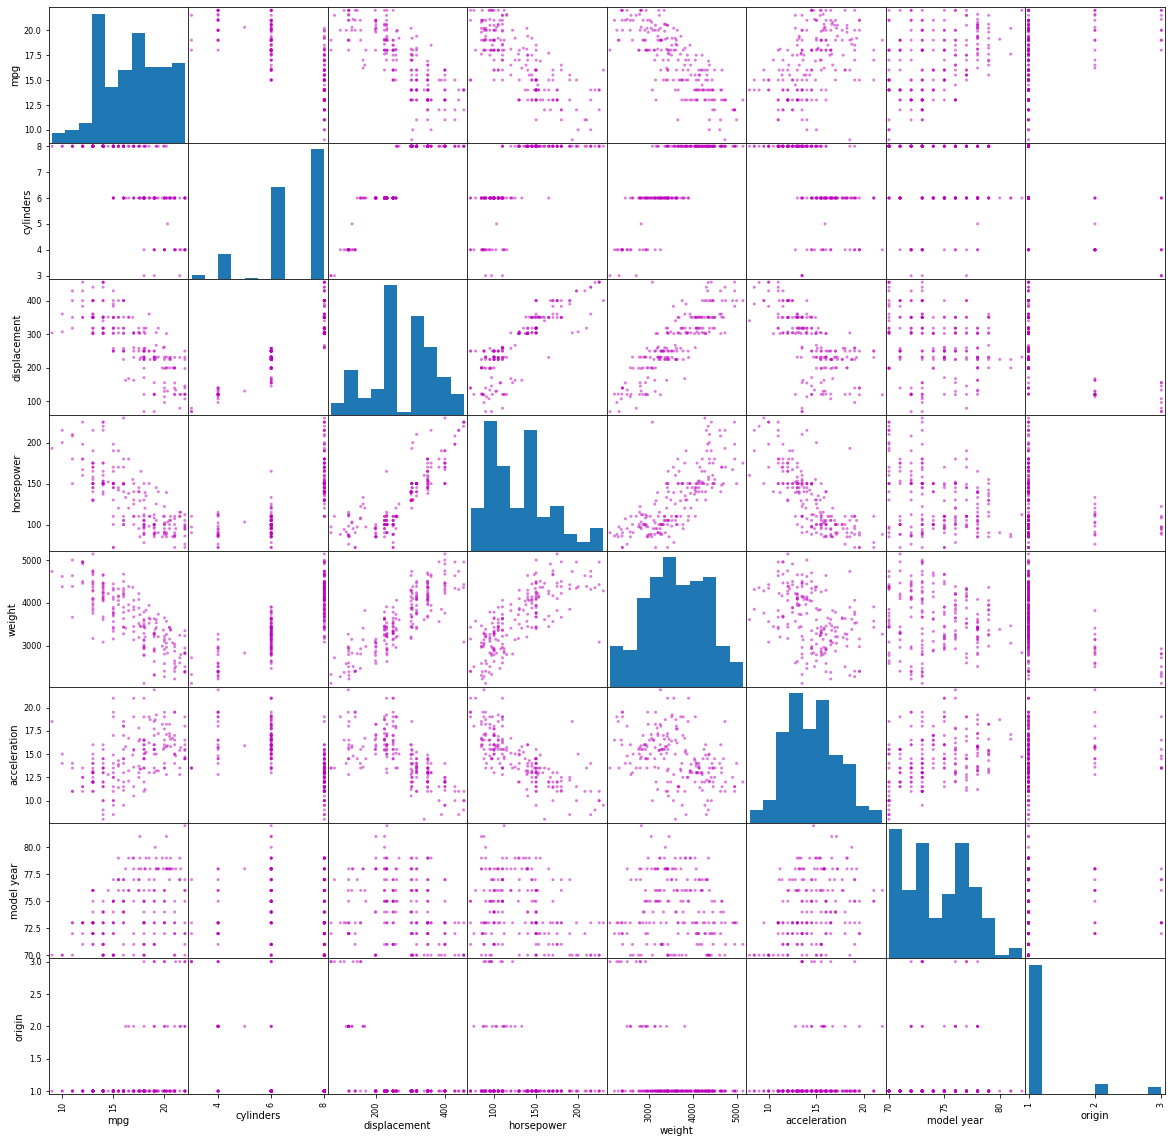

In [74]:
pd.plotting.scatter_matrix(df,figsize=(20,20),color="m")
plt.show()

In [75]:
df.nunique()

mpg              39
cylinders         5
displacement     45
horsepower       58
weight          186
acceleration     58
model year       13
origin            3
car name        152
dtype: int64

In [95]:
pd.plotting.parallel_coordinates(df,'cylinders',cols=['mpg','weight','displacement'],color=['r','y','g','black'])

KeyError: 'cylinders'

# chile.csv

In [96]:
df=pd.read_csv('chile.csv')

In [97]:
df.head()

,region,population,sex,age,education,income,statusquo,vote
0,N,175000,M,65.0,P,35000.0,1.00820,Y
1,N,175000,M,29.0,PS,7500.0,-1.29617,N
2,N,175000,F,38.0,P,15000.0,1.23072,Y
3,N,175000,F,49.0,P,35000.0,-1.03163,N
4,N,175000,F,23.0,S,35000.0,-1.10496,N


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      2700 non-null   object 
 1   population  2700 non-null   int64  
 2   sex         2700 non-null   object 
 3   age         2699 non-null   float64
 4   education   2689 non-null   object 
 5   income      2602 non-null   float64
 6   statusquo   2683 non-null   float64
 7   vote        2532 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 168.9+ KB


In [100]:
df.describe(exclude=np.number)

,region,sex,education,vote
count,2700,2700,2689,2532
unique,5,2,3,4
top,SA,F,S,N
freq,960,1379,1120,889


In [101]:
df.describe(include='all')

,region,population,sex,age,education,income,statusquo,vote
count,2700,2700.000000,2700,2699.000000,2689,2602.000000,2.683000e+03,2532
unique,5,NaN,2,NaN,3,NaN,NaN,4
top,SA,NaN,F,NaN,S,NaN,NaN,N
freq,960,NaN,1379,NaN,1120,NaN,NaN,889
mean,NaN,152222.222222,NaN,38.548722,NaN,33875.864719,-1.118151e-08,NaN
std,NaN,102198.039602,NaN,14.756415,NaN,39502.867120,1.000186e+00,NaN
min,NaN,3750.000000,NaN,18.000000,NaN,2500.000000,-1.803010e+00,NaN
25%,NaN,25000.000000,NaN,26.000000,NaN,7500.000000,-1.002235e+00,NaN
50%,NaN,175000.000000,NaN,36.000000,NaN,15000.000000,-4.558000e-02,NaN
75%,NaN,250000.000000,NaN,49.000000,NaN,35000.000000,9.685750e-01,NaN


In [102]:
df.isna().sum()

region          0
population      0
sex             0
age             1
education      11
income         98
statusquo      17
vote          168
dtype: int64

In [103]:
df=df.dropna()

In [104]:
df

,region,population,sex,age,education,income,statusquo,vote
0,N,175000,M,65.0,P,35000.0,1.00820,Y
1,N,175000,M,29.0,PS,7500.0,-1.29617,N
2,N,175000,F,38.0,P,15000.0,1.23072,Y
3,N,175000,F,49.0,P,35000.0,-1.03163,N
4,N,175000,F,23.0,S,35000.0,-1.10496,N
...,...,...,...,...,...,...,...,...
2694,M,15000,M,42.0,S,35000.0,-0.00233,U
2695,M,15000,M,42.0,P,15000.0,-1.26247,N
2696,M,15000,F,28.0,P,15000.0,1.32950,Y
2697,M,15000,F,44.0,P,75000.0,1.42045,Y


In [105]:
df.isna().sum()

region        0
population    0
sex           0
age           0
education     0
income        0
statusquo     0
vote          0
dtype: int64

In [106]:
df.nunique()

region           5
population      10
sex              2
age             53
education        3
income           7
statusquo     1878
vote             4
dtype: int64

In [111]:
pd.crosstab(df['sex'],df['education'],rownames='a',colnames='b')

b,P,PS,S
a,,,
F,552,184,514
M,450,235,496


In [113]:
pd.crosstab([df['sex'],df['education']],[df['vote'],df['region']])

vote            A                  N                  U                   Y  \
region          C  M   N   S  SA   C  M   N   S  SA   C   M   N   S  SA   C   
sex education                                                                 
F   P           5  0   6   8  12  22  3  13  33  41  38  10  14  43  62  53   
    PS          1  0   1   3   8  15  1  10  17  43   3   1   2   7  16   8   
    S          17  0   3  12  21  37  2  17  37  64  35   3  10  34  61  35   
M   P           6  1   2   5   4  48  5  15  35  47  34   3  11  36  31  32   
    PS          2  0   5   5   5  33  0  19  32  50   3   0   4   3   7  11   
    S          13  1  12   6  13  54  6  24  55  89  17   2   5  17  39  26   

vote                           
region          M   N   S  SA  
sex education                  
F   P          15  45  81  48  
    PS          2  12  13  21  
    S           6  26  42  52  
M   P           6  27  69  33  
    PS          2   8  15  31  
    S           6  14  47  50

In [114]:
pd.crosstab(df['sex'],df['education'],values=df['income'],aggfunc={min,max})

max                         min                
education         P        PS         S       P      PS       S
sex                                                            
F          125000.0  200000.0  200000.0  2500.0  2500.0  2500.0
M          200000.0  200000.0  200000.0  2500.0  7500.0  2500.0